
# Thursday Morning Session
## Single-Cell RNAseq 
## Scanpy preprocessing, clustering, visualization


In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("bone_marrow_mononuc_luecken.h5ad")

In [3]:
type(adata.obs)

pandas.core.frame.DataFrame

In [4]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [5]:
adata.X[:100,:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Preprocessing/QC

In [6]:
# find out mt and rb gene expression -- filter cells based on this info
# can take a panda series (or index) and do .str so you can use string functions on these entries
# can do startswith() on string list to get our mitochondrial genes

adata.var["mt"] = adata.var.index.str.startswith("MT-")


In [7]:
# new column which tells us if the gene name is mitochondrial (true/false)
adata.var

,mt
MIR1302-2HG,False
FAM138A,False
OR4F5,False
AL627309.1,False
AL627309.3,False
...,...
AC141272.1,False
AC023491.2,False
AC007325.1,False
AC007325.4,False


In [8]:
# can see the mt genes
adata.var[adata.var["mt"]]


,mt
MT-ND1,True
MT-ND2,True
MT-CO1,True
MT-CO2,True
MT-ATP8,True
MT-ATP6,True
MT-CO3,True
MT-ND3,True
MT-ND4L,True
MT-ND4,True


In [9]:
# we can do the same for ribosomal genes
adata.var["ribo"] = adata.var.index.str.startswith(("RPS", "RPL"))
# can add other gene names to ribo


In [10]:
# now we have a second column with the ribosomal data
adata.var

,mt,ribo
MIR1302-2HG,False,False
FAM138A,False,False
OR4F5,False,False
AL627309.1,False,False
AL627309.3,False,False
...,...,...
AC141272.1,False,False
AC023491.2,False,False
AC007325.1,False,False
AC007325.4,False,False


In [11]:
#103 ribosomal genes
adata.var[adata.var["ribo"]]

,mt,ribo
RPL22,False,True
RPL11,False,True
RPS6KA1,False,True
RPS8,False,True
RPL5,False,True
...,...,...
RPL36A,False,True
RPL39,False,True
RPL10,False,True
RPS4Y1,False,True


In [12]:
# we are looking for specifying patterns in a string
# the ^ tells python to look at the beginning of the string
# look for capital HB, then we say the next character is not P. Carrot in brackets [^] means not
# can use https://regex101.com/ to test your expression and string output

adata.var["hb"] = adata.var.index.str.contains(r"^HB[^(P)]")

Can use https://regex101.com/ to test your expression and string output

input: ^HB[^(P)]

test string:
HBABC
HBPABC
HB123
HB456

Click python, and look at output to see which strings are highlighted

In [13]:
# now we can look at the output
adata.var

,mt,ribo,hb
MIR1302-2HG,False,False,False
FAM138A,False,False,False
OR4F5,False,False,False
AL627309.1,False,False,False
AL627309.3,False,False,False
...,...,...,...
AC141272.1,False,False,False
AC023491.2,False,False,False
AC007325.1,False,False,False
AC007325.4,False,False,False


In [14]:
adata.var[adata.var["hb"]]

,mt,ribo,hb
HBEGF,False,False,True
HBS1L,False,False,True
HBB,False,False,True
HBD,False,False,True
HBG1,False,False,True
HBG2,False,False,True
HBE1,False,False,True
HBZ,False,False,True
HBM,False,False,True
HBA2,False,False,True


In [15]:
# preprocessing module is sc.pp
# first qc metrics: specify data, then specify the variables for qc
# log1p tells scanpy to compute QC metrics that rely on log transformed data as well

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"],
                           inplace=True, log1p=True)

In [16]:
# get many columns with QC data for each cell
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [17]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,6.762730,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,6.933423,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,4.969813,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393


In [18]:
# can also look at X, which is still sparse matrix
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26550469 stored elements and shape (17125, 36601)>

In [19]:
# still looks the same as before preprocessing
adata.X[:100, :100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

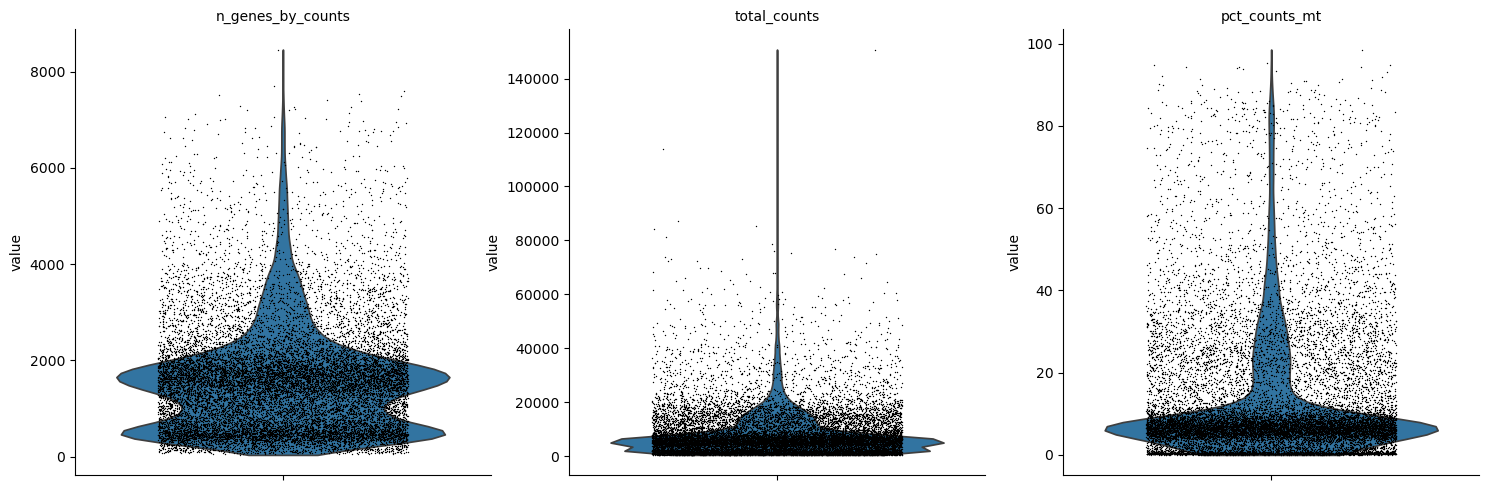

In [20]:
# a way to visualize some of these QC values
# sc.pl brings you to plotting
# this can show the 
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
             jitter=0.3,
             multi_panel=True)

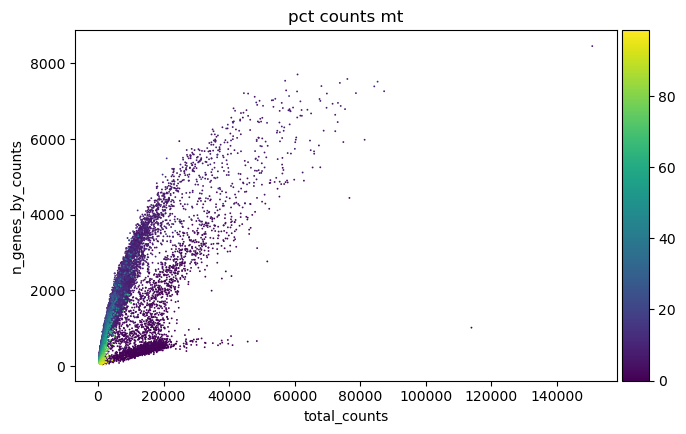

In [21]:
# another visualization is scatterplot 
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",
              color="pct_counts_mt")

In [22]:
# we can do some simple filtering
# use sc.pp for preprocessing
# filter cells if fewer than 100 genes is expressed, remove them

sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [23]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [24]:
# this adata frame has the counts stored in the .X 
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [25]:
# we're going to normalize the counts
# since the data is small, we can keep the original counts and the normalized counts as separate objects in a layer
# which is great! and not feasible with larger datasets
# we're putting the raw counts into this slot of the layers object

adata.layers["counts"] = adata.X.copy()

In [26]:
# this is how we can access the raw counts
adata.layers["counts"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [27]:
# now we can normalize the counts (the ones in X -- we'll keep the "counts" layer untouched)
# for each cell, the total number of counts is 10,000 making it easier to compare between cells
# last line is operating in place on adata

sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)

In [28]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [29]:
# still sparse, which is important
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26539065 stored elements and shape (17041, 23427)>

In [30]:
# look at nonzero entries in sparse matrix for X after we transformed it
adata.X.data

array([1.495822  , 0.76748186, 0.76748186, ..., 2.2144756 , 0.858422  ,
       4.1934786 ], dtype=float32)

In [31]:
# the raw counts are integer data, while the transformed no longer is, showing the transformation changes
adata.layers["counts"].data

array([ 3.,  1.,  1., ...,  6.,  1., 48.], dtype=float32)

In [32]:
# note that our data comes from 2 samples (s1d1 and s1d3)
adata.obs["sample"].value_counts()

sample
s1d1    8713
s1d3    8328
Name: count, dtype: int64

In [ ]:
# look for doublets and remove them
# scrublet detects doublets in scRNAseq
# error -- no module named skimage 
# need to install on command line with $ conda install scikit-image
# then restart, and run all
# this changed the numpy version from 2.0.1 to 1.26.4, see code below to check version
# to upgrade again later, $ conda install numpy = [version]
sc.pp.scrublet(adata, batch_key="sample")

In [34]:
import numpy as np
np.__version__

'1.26.4'

In [ ]:
# two new columns added, doublet score and predicted doublet (false = low score, not a doublet)
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,...,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,0.023304,False
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,...,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,3912,0.139298,False
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,...,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,0.029787,False
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,...,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4328,0.036113,False
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,...,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,323,0.018668,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,...,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,277,0.088000,False
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,...,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749,3795,0.052632,False
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,...,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482,3087,0.003868,False
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,...,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393,379,0.068257,False


In [37]:
# can inspect the doublet score with a histogram to take a look at the distribution
import matplotlib.pyplot as plt

(array([1.4081e+04, 2.0830e+03, 4.0500e+02, 1.7200e+02, 8.0000e+01,
        1.0800e+02, 4.8000e+01, 3.8000e+01, 1.8000e+01, 8.0000e+00]),
 array([0.0020202 , 0.06679514, 0.13157008, 0.19634502, 0.26111996,
        0.32589489, 0.39066983, 0.45544477, 0.52021971, 0.58499465,
        0.64976959]),
 <BarContainer object of 10 artists>)

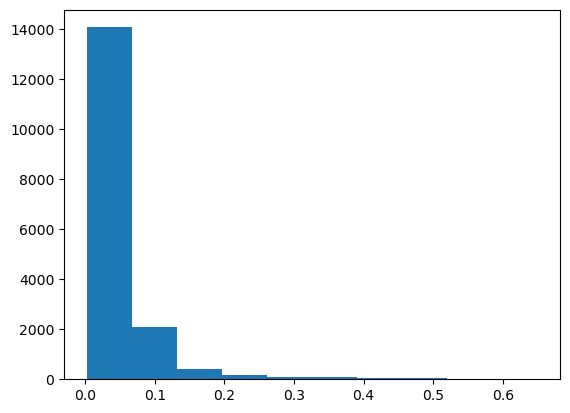

In [39]:
plt.hist(adata.obs["doublet_score"])

In [40]:
# defining the top 2000 highly variable genes and including the 2 samples as batches 
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

In [ ]:
# can see highly_variable column has true/false, and 6 other columns from this including nbatches and intersection
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,False,False,False,40,0.002336,0.002333,99.766423,40.0,3.713572,40,False,0.003879,1.068160,-0.135804,0,False
AL627309.3,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000294,0.720639,-0.706037,0,False
AL627309.5,False,False,False,155,0.009460,0.009415,99.094891,162.0,5.093750,155,False,0.018172,1.430467,0.457930,0,False
AL627309.4,False,False,False,7,0.000409,0.000409,99.959124,7.0,2.079442,7,False,0.000739,0.791405,-0.591345,0,False
AP006222.2,False,False,False,3,0.000234,0.000234,99.982482,4.0,1.609438,3,False,0.000288,0.324107,-1.352641,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,False,False,False,827,0.063358,0.061432,95.170803,1085.0,6.990256,827,False,0.053558,0.406094,-0.314774,0,False
AC233755.2,False,False,False,10,0.000818,0.000817,99.941606,14.0,2.708050,10,False,0.001516,1.039704,-0.185250,0,False
AC233755.1,False,False,False,45,0.004613,0.004603,99.737226,79.0,4.382027,45,False,0.005400,0.906056,-0.400830,0,False
AC141272.1,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000118,-0.392364,-2.534376,0,False
